In [1]:
import cv2
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
from tensorflow.keras import models,layers
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [2]:
dataset_path = "/content/drive/MyDrive/dataset/animal"

img_dt_generator = ImageDataGenerator(
    rescale=1./255,
    validation_split=0.2,
    horizontal_flip=True,
    zoom_range=0.1,
    rotation_range=10,

)

dataset_train = img_dt_generator.flow_from_directory(
    dataset_path,
    subset="training",
    shuffle=True,
    target_size=(224,224),
)

dataset_validation = img_dt_generator.flow_from_directory(
    dataset_path,
    subset="validation",
    target_size=(224,224),
    shuffle=False,
)

Found 1052 images belonging to 5 classes.
Found 262 images belonging to 5 classes.


In [3]:
model = models.Sequential([

    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(224, 224, 3)),


    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),

    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dropout(0.3),


    layers.Dense(5, activation='softmax')
])


model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
              loss="categorical_crossentropy",
              metrics=["accuracy"])

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [4]:
history = model.fit(dataset_train,epochs=20,validation_data=dataset_validation)

/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/20
33/33 ━━━━━━━━━━━━━━━━━━━━ 352s 10s/step - accuracy: 0.2201 - loss: 14.9409 - val_accuracy: 0.3931 - val_loss: 1.4909
Epoch 2/20
33/33 ━━━━━━━━━━━━━━━━━━━━ 292s 9s/step - accuracy: 0.3796 - loss: 1.4573 - val_accuracy: 0.4084 - val_loss: 1.4169
Epoch 3/20
33/33 ━━━━━━━━━━━━━━━━━━━━ 285s 9s/step - accuracy: 0.4668 - loss: 1.3016 - val_accuracy: 0.5496 - val_loss: 1.2377
Epoch 4/20
33/33 ━━━━━━━━━━━━━━━━━━━━ 296s 9s/step - accuracy: 0.5480 - loss: 1.1513 - val_accuracy: 0.5802 - val_loss: 1.1523
Epoch 5/20
33/33 ━━━━━━━━━━━━━━━━━━━━ 284s 9s/step - accuracy: 0.5761 - loss: 1.0904 - val_accuracy: 0.5420 - val_loss: 1.1784
Epoch 6/20
33/33 ━━━━━━━━━━━━━━━━━━━━ 293s 9s/step - accuracy: 0.6010 - loss: 1.0055 - val_accuracy: 0.5878 - val_loss: 1.1089
Epoch 7/20
33/33 ━━━━━━━━━━━━━━━━━━━━ 286s 9s/step - accuracy: 0.6692 - loss: 0.8859 - val_accuracy: 0.5763 - val_loss: 1.0454
Epoch 8/20
33/33 ━━━━━━━━━━━━━━━━━━━━ 295s 9s/step - accuracy: 0.6949 - loss: 0.8125 - val_accuracy: 0.5878 -

In [5]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 222, 222, 32)        │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 220, 220, 64)        │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 110, 110, 64)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 774400)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 128)                 │      99,123,328 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 5)                   │             645 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 297,430,097 (1.11 GB)

 Trainable params: 99,143,365 (378.20 MB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 198,286,732 (756.40 MB)

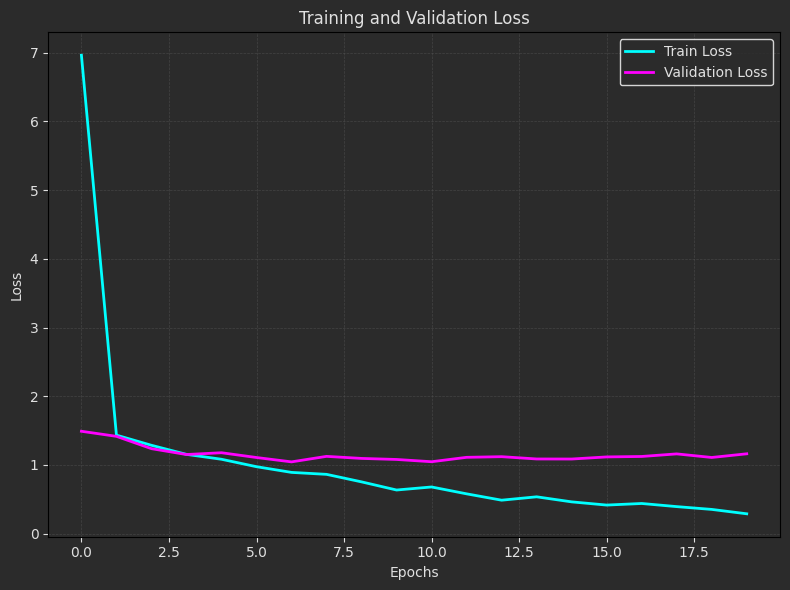

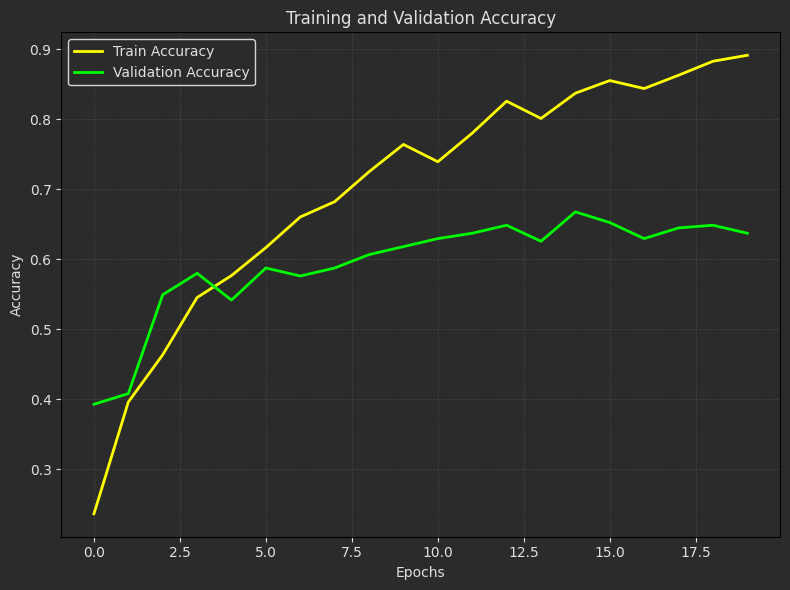

In [6]:
fig, ax = plt.subplots(figsize=(8, 6))
fig.patch.set_facecolor('#2b2b2b')

ax.plot(history.history['loss'], label='Train Loss', color='cyan', linewidth=2)
ax.plot(history.history['val_loss'], label='Validation Loss', color='magenta', linewidth=2)

ax.set_title('Training and Validation Loss', color='#e0e0e0')
ax.set_xlabel('Epochs', color='#e0e0e0')
ax.set_ylabel('Loss', color='#e0e0e0')
ax.tick_params(colors='#e0e0e0')
ax.grid(color='#555555', linestyle='--', linewidth=0.5, alpha=0.6)
ax.set_facecolor('#2b2b2b')
ax.legend(facecolor='#2b2b2b', edgecolor='white', labelcolor='#e0e0e0')

plt.tight_layout()



fig, ax = plt.subplots(figsize=(8, 6))
fig.patch.set_facecolor('#2b2b2b')

ax.plot(history.history['accuracy'], label='Train Accuracy', color='yellow', linewidth=2)
ax.plot(history.history['val_accuracy'], label='Validation Accuracy', color='lime', linewidth=2)

ax.set_title('Training and Validation Accuracy', color='#e0e0e0')
ax.set_xlabel('Epochs', color='#e0e0e0')
ax.set_ylabel('Accuracy', color='#e0e0e0')
ax.tick_params(colors='#e0e0e0')
ax.grid(color='#555555', linestyle='--', linewidth=0.5, alpha=0.6)
ax.set_facecolor('#2b2b2b')
ax.legend(facecolor='#2b2b2b', edgecolor='white', labelcolor='#e0e0e0')

plt.tight_layout()

In [7]:

y_gt = dataset_validation.classes
y_pred = model.predict(dataset_validation)
y_pred = np.argmax(y_pred, axis=1)
conf_matrix = confusion_matrix(y_gt, y_pred)
conf_matrix

9/9 ━━━━━━━━━━━━━━━━━━━━ 21s 2s/step


array([[28, 16,  4,  6,  4],
       [11, 31,  9,  9,  3],
       [ 1,  1, 36,  2,  2],
       [ 1,  5,  4, 35,  0],
       [ 1,  4,  6,  1, 42]])

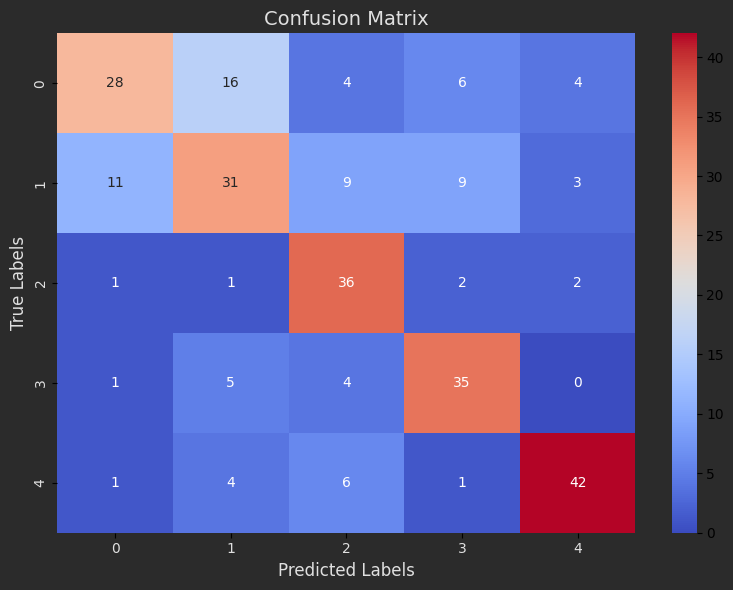

In [8]:
import seaborn as sns

plt.figure(figsize=(8, 6))
fig = plt.gcf()
fig.patch.set_facecolor('#2b2b2b')

sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="coolwarm", cbar=True)
plt.title("Confusion Matrix", fontsize=14, color='#e0e0e0')
plt.xlabel("Predicted Labels", fontsize=12, color='#e0e0e0')
plt.ylabel("True Labels", fontsize=12, color='#e0e0e0')
plt.xticks(color='#e0e0e0')
plt.yticks(color='#e0e0e0')

plt.tight_layout()
plt.show()


In [12]:

image_test_1 = cv2.imread("dog_1.jpg",1)
image_test_1 = cv2.resize(image_test_1,(224,224))
image_test_1 = image_test_1 / 255.0

test_1 = model.predict(np.array([image_test_1]))
predicted_class = np.argmax(test_1)


if predicted_class == 0:
    print("Cat")
elif predicted_class == 1:
    print("Dog")
elif predicted_class == 2:
    print("Elephant")
elif predicted_class == 3:
    print("Giraffe")
elif predicted_class == 4:
    print("Panda")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 128ms/step
Panda
